# 2. LIMPIEZA DE DATOS

1. **Renombrar y eliminar variables**
    - Usar formato `snake_case`
    - Nombres consistentes y en el mismo idioma
    - Eliminar caracteres especiales

2. **Tipos de datos correctos**
    - Convertir números almacenados como texto.
    - Parsear fechas correctamente.
    - Detectar variables categóricas mal codificadas.
    - Asegurar que los identificadores sean strings.

3. **Duplicados**
    - Detectar exactos y parciales.
    - Definir criterio de retención (más reciente o completo).
    - Registrar cantidad y método aplicado.

4. **Rango de valores válidos**
    - Eliminar valores negativos imposibles.
    - Validar porcentajes (0–100 o 0–1).
    - Revisar fechas lógicas (no futuras o irreales).
    - Verificar coordenadas y límites máximos definidos.

5. **Limpieza y unificación de categorías**

    - Estandarizar formato de texto (minúsculas, acentos, errores tipográficos).
    - Homogeneizar valores booleanos ("sí/no", "1/0").
    - Unificar sinónimos (ej. "auto", "carro" → "automóvil").
    - Agrupar categorías relacionadas ("tablet", "celular" → "electrónica").
    - Documentar los mapeos originales y unificados.

6. **Alta cardinalidad**
    - Cuantificar categorías únicas.
    - Agrupar categorías raras (<5%) en “Otros”.
    - Considerar jerarquías (“ciudad → región → país”).
    - Documentar decisiones y su impacto.

7. **Validación de la variable objetivo**
    - Confirmar que no haya valores faltantes.
    - Revisar rango lógico.
    - Verificar distribución y representatividad.
    - Detectar valores extremos sospechosos.

>**Acciones:** eliminar, truncar, corregir o marcar.


## 0. Carga de Datos

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 500)
pd.set_option('display.float_format', '{:.2f}'.format)

In [169]:
# Leer de nuevo el parquet
icfes = pd.read_parquet("C:/Users/CACTU/Downloads/Proyectos/prediccion-icfes-colombia/data/raw/icfes.parquet")
icfes.head(4)

,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_TIENEETNIA,ESTU_ETNIA,ESTU_DEPTO_RESIDE,ESTU_MCPIO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_SEDE_PRINCIPAL,COLE_AREA_UBICACION,COLE_JORNADA,COLE_MCPIO_UBICACION,COLE_DEPTO_UBICACION,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO
0,COLOMBIA,M,18/02/2002,No,-,MAGDALENA,SANTA ANA,Estrato 3,5 a 6,Cinco,Educación profesional completa,Secundaria (Bachillerato) completa,No aplica,"Trabaja en el hogar, no trabaja o estudia",Si,Si,No,Si,Si,No,No,No,MÁS DE 100 LIBROS,1 o 2 veces por semana,3 a 5 veces por semana,Nunca o rara vez comemos eso,Peor,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,S,URBANO,MAÑANA,SANTA ANA,MAGDALENA,SANTA ANA,MAGDALENA,47,33,2,48,42,2,37,15,1,30,8,1,54.00,67,A1,208,25,509.421.557.404.314,2,2.00
1,COLOMBIA,M,28/06/2003,No,-,BOGOTÁ,BOGOTÁ D.C.,Estrato 3,9 o más,Tres,Técnica o tecnológica completa,Técnica o tecnológica completa,Trabaja por cuenta propia (por ejemplo plomero...,Es dueño de un negocio pequeño (tiene pocos em...,Si,Si,Si,Si,Si,Si,No,No,MÁS DE 100 LIBROS,Todos o casi todos los días,3 a 5 veces por semana,1 o 2 veces por semana,Mejor,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Menos de 10 horas,"Si, en efectivo",MIXTO,NO OFICIAL,A,S,URBANO,COMPLETA,BOGOTÁ D.C.,BOGOTÁ,BOGOTÁ D.C.,BOGOTÁ,60,76,3,65,88,3,54,71,2,59,83,3,63.00,88,A2,299,83,59.767.864.431.576,3,4.00
2,COLOMBIA,M,2/06/2001,No,-,BOLIVAR,CARTAGENA DE INDIAS,Estrato 1,5 a 6,Dos,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Es vendedor o trabaja en atención al público,Es vendedor o trabaja en atención al público,No,Si,No,Si,No,No,No,No,26 A 100 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,Entre 30 y 60 minutos,Más de 3 horas,0,"Si, en efectivo",MIXTO,OFICIAL,A,S,URBANO,MAÑANA,CARTAGENA DE INDIAS,BOLIVAR,CARTAGENA DE INDIAS,BOLIVAR,66,91,4,57,70,3,41,29,2,74,99,4,64.00,89,A2,299,84,507.642.383.644.749,2,3.00
3,COLOMBIA,M,26/04/2002,Si,Ninguno,BOGOTÁ,BOGOTÁ D.C.,Estrato 3,3 a 4,Dos,Primaria incompleta,Secundaria (Bachillerato) completa,No aplica,Es dueño de un negocio pequeño (tiene pocos em...,No,No,Si,No,No,No,No,No,11 A 25 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,30 minutos o menos,Entre 30 y 60 minutos,Más de 30 horas,"Si, en efectivo",MIXTO,OFICIAL,A,S,URBANO,MAÑANA,BOGOTÁ D.C.,BOGOTÁ,BOGOTÁ D.C.,BOGOTÁ,62,81,3,54,60,3,61,87,3,73,99,4,53.00,67,A1,309,88,457.791.353.123.516,2,3.00


## 1. Renombrar Variables

In [170]:
### Renombramos las variables
icfes.columns = ["nacionalidad", "genero", "fecha_nac", "pertenece_etnia", "etnia_estudiante", "dpto_est_reside", 
                 "mpio_est_reside", "estrato_casa", "num_personas_casa", "num_cuartos_casa", "nivel_edu_padre", 
                 "nivel_edu_madre", "actividad_madre", "actividad_padre", "internet", "tv", "computador", "lavadora", 
                 "microndas", "carro", "moto", "consola", "num_libros", "freq_leche_derivados", "freq_carne_pescado_similares",
                 "freq_cereales_frutos_legumbres", "situacion_economica_casa", "tiempo_lectura", "tiempo_internet", 
                 "horas_trabajo_semanal", "tipo_remuneracion", "colegio_genero", "colegio_naturaleza", "colegio_calendario", 
                 "colegio_caracter", "colegio_area", "colegio_jornada", "colegio_mpio", "colegio_dpto", 
                 "est_mpio_presento_examen", "est_dpto_presento_examen", "puntaje_lectura", "percentil_lectura", 
                 "nivel_lectura", "puntaje_matematicas", "percentil_matematicas", "nivel_matematicas", "puntaje_naturales", 
                 "percentil_naturales", "nivel_naturales", "puntaje_sociales", "percentil_sociales", "nivel_sociales", 
                 "puntaje_ingles", "percentil_ingles", "nivel_ingles", "puntaje_global", "percentil_global", "inse_estudiante", 
                 "nse_estudiante", "nse_colegio"]

icfes.head(4)

,nacionalidad,genero,fecha_nac,pertenece_etnia,etnia_estudiante,dpto_est_reside,mpio_est_reside,estrato_casa,num_personas_casa,num_cuartos_casa,nivel_edu_padre,nivel_edu_madre,actividad_madre,actividad_padre,internet,tv,computador,lavadora,microndas,carro,moto,consola,num_libros,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,situacion_economica_casa,tiempo_lectura,tiempo_internet,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,est_mpio_presento_examen,est_dpto_presento_examen,puntaje_lectura,percentil_lectura,nivel_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio
0,COLOMBIA,M,18/02/2002,No,-,MAGDALENA,SANTA ANA,Estrato 3,5 a 6,Cinco,Educación profesional completa,Secundaria (Bachillerato) completa,No aplica,"Trabaja en el hogar, no trabaja o estudia",Si,Si,No,Si,Si,No,No,No,MÁS DE 100 LIBROS,1 o 2 veces por semana,3 a 5 veces por semana,Nunca o rara vez comemos eso,Peor,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,S,URBANO,MAÑANA,SANTA ANA,MAGDALENA,SANTA ANA,MAGDALENA,47,33,2,48,42,2,37,15,1,30,8,1,54.00,67,A1,208,25,509.421.557.404.314,2,2.00
1,COLOMBIA,M,28/06/2003,No,-,BOGOTÁ,BOGOTÁ D.C.,Estrato 3,9 o más,Tres,Técnica o tecnológica completa,Técnica o tecnológica completa,Trabaja por cuenta propia (por ejemplo plomero...,Es dueño de un negocio pequeño (tiene pocos em...,Si,Si,Si,Si,Si,Si,No,No,MÁS DE 100 LIBROS,Todos o casi todos los días,3 a 5 veces por semana,1 o 2 veces por semana,Mejor,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Menos de 10 horas,"Si, en efectivo",MIXTO,NO OFICIAL,A,S,URBANO,COMPLETA,BOGOTÁ D.C.,BOGOTÁ,BOGOTÁ D.C.,BOGOTÁ,60,76,3,65,88,3,54,71,2,59,83,3,63.00,88,A2,299,83,59.767.864.431.576,3,4.00
2,COLOMBIA,M,2/06/2001,No,-,BOLIVAR,CARTAGENA DE INDIAS,Estrato 1,5 a 6,Dos,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Es vendedor o trabaja en atención al público,Es vendedor o trabaja en atención al público,No,Si,No,Si,No,No,No,No,26 A 100 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,Entre 30 y 60 minutos,Más de 3 horas,0,"Si, en efectivo",MIXTO,OFICIAL,A,S,URBANO,MAÑANA,CARTAGENA DE INDIAS,BOLIVAR,CARTAGENA DE INDIAS,BOLIVAR,66,91,4,57,70,3,41,29,2,74,99,4,64.00,89,A2,299,84,507.642.383.644.749,2,3.00
3,COLOMBIA,M,26/04/2002,Si,Ninguno,BOGOTÁ,BOGOTÁ D.C.,Estrato 3,3 a 4,Dos,Primaria incompleta,Secundaria (Bachillerato) completa,No aplica,Es dueño de un negocio pequeño (tiene pocos em...,No,No,Si,No,No,No,No,No,11 A 25 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,30 minutos o menos,Entre 30 y 60 minutos,Más de 30 horas,"Si, en efectivo",MIXTO,OFICIAL,A,S,URBANO,MAÑANA,BOGOTÁ D.C.,BOGOTÁ,BOGOTÁ D.C.,BOGOTÁ,62,81,3,54,60,3,61,87,3,73,99,4,53.00,67,A1,309,88,457.791.353.123.516,2,3.00


In [171]:
import re

# Convertir nombres a snake_case y eliminar caracteres especiales
icfes.columns = [re.sub(r'\W+', '_', col.strip().lower()) for col in icfes.columns]

# Eliminar guiones bajos múltiples y al inicio/final
icfes.columns = [re.sub(r'_+', '_', col).strip('_') for col in icfes.columns]
print("Columnas renombradas:")
icfes.head(4)

Columnas renombradas:


,nacionalidad,genero,fecha_nac,pertenece_etnia,etnia_estudiante,dpto_est_reside,mpio_est_reside,estrato_casa,num_personas_casa,num_cuartos_casa,nivel_edu_padre,nivel_edu_madre,actividad_madre,actividad_padre,internet,tv,computador,lavadora,microndas,carro,moto,consola,num_libros,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,situacion_economica_casa,tiempo_lectura,tiempo_internet,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,est_mpio_presento_examen,est_dpto_presento_examen,puntaje_lectura,percentil_lectura,nivel_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio
0,COLOMBIA,M,18/02/2002,No,-,MAGDALENA,SANTA ANA,Estrato 3,5 a 6,Cinco,Educación profesional completa,Secundaria (Bachillerato) completa,No aplica,"Trabaja en el hogar, no trabaja o estudia",Si,Si,No,Si,Si,No,No,No,MÁS DE 100 LIBROS,1 o 2 veces por semana,3 a 5 veces por semana,Nunca o rara vez comemos eso,Peor,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,S,URBANO,MAÑANA,SANTA ANA,MAGDALENA,SANTA ANA,MAGDALENA,47,33,2,48,42,2,37,15,1,30,8,1,54.00,67,A1,208,25,509.421.557.404.314,2,2.00
1,COLOMBIA,M,28/06/2003,No,-,BOGOTÁ,BOGOTÁ D.C.,Estrato 3,9 o más,Tres,Técnica o tecnológica completa,Técnica o tecnológica completa,Trabaja por cuenta propia (por ejemplo plomero...,Es dueño de un negocio pequeño (tiene pocos em...,Si,Si,Si,Si,Si,Si,No,No,MÁS DE 100 LIBROS,Todos o casi todos los días,3 a 5 veces por semana,1 o 2 veces por semana,Mejor,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Menos de 10 horas,"Si, en efectivo",MIXTO,NO OFICIAL,A,S,URBANO,COMPLETA,BOGOTÁ D.C.,BOGOTÁ,BOGOTÁ D.C.,BOGOTÁ,60,76,3,65,88,3,54,71,2,59,83,3,63.00,88,A2,299,83,59.767.864.431.576,3,4.00
2,COLOMBIA,M,2/06/2001,No,-,BOLIVAR,CARTAGENA DE INDIAS,Estrato 1,5 a 6,Dos,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Es vendedor o trabaja en atención al público,Es vendedor o trabaja en atención al público,No,Si,No,Si,No,No,No,No,26 A 100 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,Entre 30 y 60 minutos,Más de 3 horas,0,"Si, en efectivo",MIXTO,OFICIAL,A,S,URBANO,MAÑANA,CARTAGENA DE INDIAS,BOLIVAR,CARTAGENA DE INDIAS,BOLIVAR,66,91,4,57,70,3,41,29,2,74,99,4,64.00,89,A2,299,84,507.642.383.644.749,2,3.00
3,COLOMBIA,M,26/04/2002,Si,Ninguno,BOGOTÁ,BOGOTÁ D.C.,Estrato 3,3 a 4,Dos,Primaria incompleta,Secundaria (Bachillerato) completa,No aplica,Es dueño de un negocio pequeño (tiene pocos em...,No,No,Si,No,No,No,No,No,11 A 25 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,30 minutos o menos,Entre 30 y 60 minutos,Más de 30 horas,"Si, en efectivo",MIXTO,OFICIAL,A,S,URBANO,MAÑANA,BOGOTÁ D.C.,BOGOTÁ,BOGOTÁ D.C.,BOGOTÁ,62,81,3,54,60,3,61,87,3,73,99,4,53.00,67,A1,309,88,457.791.353.123.516,2,3.00


## 2. Tipos de Datos Correctos

In [172]:
for col in icfes.select_dtypes(include=["int64", "float64"]).columns:
    n_unique = icfes[col].nunique()
    if n_unique < 20:  # arbitrario, pocos valores únicos
        print(f"⚠️ {col} es numérica pero parece categórica ({n_unique} valores únicos)")

⚠️ nivel_lectura es numérica pero parece categórica (4 valores únicos)
⚠️ nivel_matematicas es numérica pero parece categórica (4 valores únicos)
⚠️ nivel_naturales es numérica pero parece categórica (4 valores únicos)
⚠️ nivel_sociales es numérica pero parece categórica (4 valores únicos)
⚠️ nse_colegio es numérica pero parece categórica (4 valores únicos)


### Reemplazar el símbolo "-" por NaN

In [173]:
### Cambiando el simbolo "-" por NaN para poder imputar después
# Lista para almacenar las columnas que contienen "-"
columnas_con_guion = [col for col in icfes.columns if "-" in icfes[col].astype(str).unique()]
print(columnas_con_guion)  # 🔍 Muestra las columnas que contienen "-"

for col in columnas_con_guion:
    icfes[col] = icfes[col].replace({"-": np.nan})

['genero', 'pertenece_etnia', 'etnia_estudiante', 'estrato_casa', 'num_personas_casa', 'num_cuartos_casa', 'nivel_edu_padre', 'nivel_edu_madre', 'actividad_madre', 'actividad_padre', 'internet', 'tv', 'computador', 'lavadora', 'microndas', 'carro', 'moto', 'consola', 'num_libros', 'freq_leche_derivados', 'freq_carne_pescado_similares', 'freq_cereales_frutos_legumbres', 'situacion_economica_casa', 'tiempo_lectura', 'tiempo_internet', 'horas_trabajo_semanal', 'tipo_remuneracion', 'percentil_global', 'inse_estudiante', 'nse_estudiante']


### 2.1 Variables Numéricas Almacenadas como Texto

In [174]:
icfes.sample(5)

,nacionalidad,genero,fecha_nac,pertenece_etnia,etnia_estudiante,dpto_est_reside,mpio_est_reside,estrato_casa,num_personas_casa,num_cuartos_casa,nivel_edu_padre,nivel_edu_madre,actividad_madre,actividad_padre,internet,tv,computador,lavadora,microndas,carro,moto,consola,num_libros,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,situacion_economica_casa,tiempo_lectura,tiempo_internet,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,est_mpio_presento_examen,est_dpto_presento_examen,puntaje_lectura,percentil_lectura,nivel_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio
320980,COLOMBIA,M,11/10/1999,No,NaN,SUCRE,SINCELEJO,Estrato 1,5 a 6,Tres,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,"Trabaja en el hogar, no trabaja o estudia","Trabaja como personal de limpieza, mantenimien...",Si,Si,Si,Si,Si,No,Si,No,11 A 25 LIBROS,3 a 5 veces por semana,1 o 2 veces por semana,1 o 2 veces por semana,Mejor,No leo por entretenimiento,Entre 1 y 3 horas,0,No,MIXTO,OFICIAL,A,S,URBANO,MAÑANA,SINCELEJO,SUCRE,SINCELEJO,SUCRE,34,5,1,20,1,1,40,23,1,30,7,1,37.00,20,A-,157,3,51.661.218.747.373,3,2.00
336357,COLOMBIA,F,22/11/2001,No,NaN,CUNDINAMARCA,SOACHA,Estrato 3,3 a 4,Dos,Primaria completa,Primaria completa,Es vendedor o trabaja en atención al público,"Trabaja en el hogar, no trabaja o estudia",Si,No,Si,Si,No,No,No,No,11 A 25 LIBROS,Todos o casi todos los días,1 o 2 veces por semana,Nunca o rara vez comemos eso,Igual,30 minutos o menos,Entre 1 y 3 horas,0,No,MIXTO,OFICIAL,A,N,URBANO,UNICA,SOACHA,CUNDINAMARCA,SOACHA,CUNDINAMARCA,48,35,2,38,15,2,41,26,2,43,43,2,57.00,75,A1,218,32,477.692.240.694.263,2,2.00
165358,COLOMBIA,M,7/08/1996,No,NaN,LA GUAJIRA,MAICAO,Sin Estrato,7 a 8,Tres,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Trabaja por cuenta propia (por ejemplo plomero...,"Trabaja en el hogar, no trabaja o estudia",Si,Si,Si,Si,Si,No,Si,No,0 A 10 LIBROS,Nunca o rara vez comemos eso,Todos o casi todos los días,1 o 2 veces por semana,Igual,30 minutos o menos,Entre 30 y 60 minutos,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,URBANO,NOCHE,MAICAO,LA GUAJIRA,MAICAO,LA GUAJIRA,39,12,2,25,1,1,43,34,2,35,21,1,26.00,2,A-,174,7,516.645.661.439.182,3,2.00
2049,COLOMBIA,F,29/10/1966,No,NaN,ANTIOQUIA,ITAGÜÍ,Estrato 2,7 a 8,Tres,Primaria incompleta,Primaria incompleta,Es operario de máquinas o conduce vehículos (t...,"Trabaja en el hogar, no trabaja o estudia",Si,Si,No,Si,No,No,No,No,0 A 10 LIBROS,3 a 5 veces por semana,3 a 5 veces por semana,Todos o casi todos los días,Igual,Más de 2 horas,30 minutos o menos,Menos de 10 horas,"Si, en efectivo",MIXTO,OFICIAL,A,S,RURAL,NOCHE,ITAGÜÍ,ANTIOQUIA,ITAGÜÍ,ANTIOQUIA,43,21,2,39,17,2,44,36,2,36,24,1,38.00,23,A-,202,21,440.493.121.211.031,2,2.00
74753,COLOMBIA,M,2/03/2001,No,NaN,NARIÑO,TÚQUERRES,Estrato 1,3 a 4,Dos,Primaria incompleta,Secundaria (Bachillerato) completa,Es operario de máquinas o conduce vehículos (t...,Es vendedor o trabaja en atención al público,Si,No,Si,Si,No,No,No,No,11 A 25 LIBROS,1 o 2 veces por semana,3 a 5 veces por semana,Todos o casi todos los días,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,0,No,MIXTO,OFICIAL,A,S,URBANO,MAÑANA,TÚQUERRES,NARIÑO,TÚQUERRES,NARIÑO,56,64,3,64,87,3,61,88,3,53,69,2,48.00,51,A1,288,78,493.789.889.499.814,2,2.00


In [175]:
# Convertir la columna a string primero para asegurar que podemos manipular el texto
icfes['inse_estudiante'] = icfes['inse_estudiante'].astype(str)

# Eliminar puntos y caracteres no numéricos
icfes['inse_estudiante'] = icfes['inse_estudiante'].str.replace('.', '')
icfes['inse_estudiante'] = icfes['inse_estudiante'].str.extract('(\d+)', expand=False)

# Tomar los primeros 4 dígitos y formatear como XX.XX
icfes['inse_estudiante'] = icfes['inse_estudiante'].str[:4]
icfes['inse_estudiante'] = icfes['inse_estudiante'].str[:2] + '.' + icfes['inse_estudiante'].str[2:]

# Convertir a float
icfes['inse_estudiante'] = pd.to_numeric(icfes['inse_estudiante'], errors='coerce')

icfes['inse_estudiante']

0        50.94
1        59.76
2        50.76
3        45.77
4        52.91
          ... 
546207   47.58
546208   57.40
546209   71.22
546210   38.13
546211   49.78
Name: inse_estudiante, Length: 546212, dtype: float64

In [176]:
icfes['nse_estudiante'].value_counts(dropna=False)

nse_estudiante
2       197566
3       193431
1        94455
4        43715
None     17041
NaN          4
Name: count, dtype: int64

In [177]:
icfes['nse_estudiante'] = pd.to_numeric(icfes['nse_estudiante'], errors='coerce')

In [178]:
icfes['nse_estudiante'].value_counts(dropna=False)

nse_estudiante
2.00    197566
3.00    193431
1.00     94455
4.00     43715
NaN      17045
Name: count, dtype: int64

In [179]:
icfes['percentil_global'].value_counts(dropna=False)

percentil_global
22     6443
69     6280
19     6183
3      6178
46     6111
       ... 
39     4405
36     4371
31     4320
56     4251
NaN      19
Name: count, Length: 101, dtype: int64

In [180]:
icfes['percentil_global'] = pd.to_numeric(icfes['percentil_global'], errors='coerce')
# Re calculamos el percentilo del puntaje global para rellenar
icfes['percentil_provisorio'] = icfes['puntaje_global'].rank(pct=True) * 100

comparacion = icfes.loc[icfes['percentil_global'].notna(), ['puntaje_global', 'percentil_global', 'percentil_provisorio']]
comparacion['diferencia'] = comparacion['percentil_global'] - comparacion['percentil_provisorio']

print(comparacion['diferencia'].describe())

count   546193.00
mean        -0.01
std          0.40
min         -0.97
25%         -0.29
50%          0.02
75%          0.27
max          1.00
Name: diferencia, dtype: float64


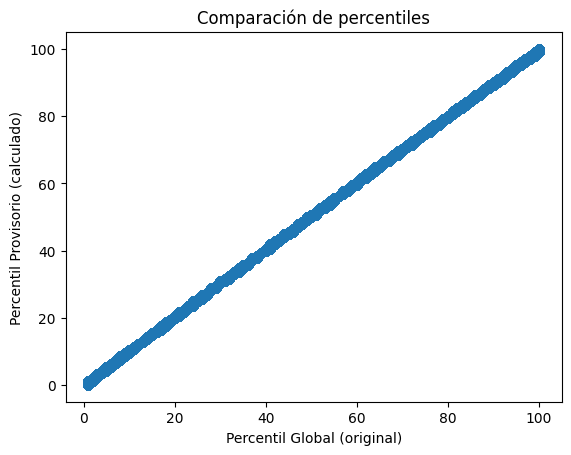

In [181]:
plt.scatter(comparacion['percentil_global'], comparacion['percentil_provisorio'], alpha=0.4)
plt.xlabel('Percentil Global (original)')
plt.ylabel('Percentil Provisorio (calculado)')
plt.title('Comparación de percentiles')
plt.show()

In [182]:
icfes['percentil_global'] = icfes['percentil_global'].fillna(icfes['percentil_provisorio']).round(0)
icfes['percentil_provisorio'] = icfes['puntaje_global'].rank(pct=True) * 100
icfes.drop(columns='percentil_provisorio', inplace=True)
icfes['percentil_global'].value_counts(dropna=False)

percentil_global
22.00    6443
69.00    6280
19.00    6183
3.00     6181
46.00    6111
         ... 
39.00    4405
36.00    4371
31.00    4321
56.00    4251
0.00        3
Name: count, Length: 101, dtype: int64

In [183]:
icfes.groupby('percentil_global')['puntaje_global'].agg(['min', 'max', 'mean']).reset_index().round(0)

,percentil_global,min,max,mean
0,0.00,82,139,102.00
1,1.00,0,152,142.00
2,2.00,150,156,153.00
3,3.00,157,161,159.00
4,4.00,162,165,163.00
...,...,...,...,...
96,96.00,336,341,338.00
97,97.00,341,347,344.00
98,98.00,347,355,351.00
99,99.00,355,367,361.00


### 2.2 Parsear Fechas

In [193]:
icfes.sample(6)

,nacionalidad,genero,fecha_nac,pertenece_etnia,etnia_estudiante,dpto_est_reside,mpio_est_reside,estrato_casa,num_personas_casa,num_cuartos_casa,nivel_edu_padre,nivel_edu_madre,actividad_madre,actividad_padre,internet,tv,computador,lavadora,microndas,carro,moto,consola,num_libros,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,situacion_economica_casa,tiempo_lectura,tiempo_internet,horas_trabajo_semanal,tipo_remuneracion,colegio_genero,colegio_naturaleza,colegio_calendario,colegio_caracter,colegio_area,colegio_jornada,colegio_mpio,colegio_dpto,est_mpio_presento_examen,est_dpto_presento_examen,puntaje_lectura,percentil_lectura,nivel_lectura,puntaje_matematicas,percentil_matematicas,nivel_matematicas,puntaje_naturales,percentil_naturales,nivel_naturales,puntaje_sociales,percentil_sociales,nivel_sociales,puntaje_ingles,percentil_ingles,nivel_ingles,puntaje_global,percentil_global,inse_estudiante,nse_estudiante,nse_colegio
96609,COLOMBIA,M,17/10/2002,No,NaN,VALLE,CALI,Estrato 2,3 a 4,Tres,Secundaria (Bachillerato) completa,Primaria completa,Es operario de máquinas o conduce vehículos (t...,"Trabaja en el hogar, no trabaja o estudia",Si,Si,Si,Si,No,No,No,No,11 A 25 LIBROS,3 a 5 veces por semana,Todos o casi todos los días,3 a 5 veces por semana,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,0,No,MIXTO,NO OFICIAL,A,S,URBANO,MAÑANA,CALI,VALLE,CALI,VALLE,65,88,3,56,67,3,51,61,2,61,87,3,50.00,55,A1,288,78.00,51.82,3.00,3.00
92306,COLOMBIA,M,03/12/2001,No,NaN,ATLANTICO,PIOJÓ,Estrato 1,5 a 6,Dos,Secundaria (Bachillerato) completa,Primaria incompleta,Es operario de máquinas o conduce vehículos (t...,"Trabaja en el hogar, no trabaja o estudia",No,No,No,Si,No,No,No,No,0 A 10 LIBROS,1 o 2 veces por semana,1 o 2 veces por semana,Nunca o rara vez comemos eso,Igual,Más de 2 horas,No Navega Internet,Más de 30 horas,"Si, en efectivo",MIXTO,OFICIAL,A,S,RURAL,MAÑANA,PIOJÓ,ATLANTICO,SABANALARGA,ATLANTICO,34,4,1,48,43,2,33,7,1,35,19,1,31.00,8,A-,185,12.00,37.29,1.00,2.00
299343,COLOMBIA,F,03/02/2003,Si,Comunidad afrodescendiente,CESAR,AGUSTÍN CODAZZI,Estrato 3,3 a 4,Dos,Secundaria (Bachillerato) completa,Primaria completa,No aplica,No aplica,Si,Si,Si,Si,Si,No,Si,No,26 A 100 LIBROS,Nunca o rara vez comemos eso,1 o 2 veces por semana,Todos o casi todos los días,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,0,No,MIXTO,OFICIAL,A,S,RURAL,MAÑANA,AGUSTÍN CODAZZI,CESAR,AGUSTÍN CODAZZI,CESAR,45,25,2,36,12,2,35,12,1,31,11,1,38.00,22,A-,184,12.00,52.86,3.00,2.00
489942,COLOMBIA,F,20/05/2001,No,NaN,VALLE,DAGUA,Estrato 1,NaN,None,Primaria incompleta,Secundaria (Bachillerato) incompleta,NaN,None,No,Si,NaN,None,NaN,None,NaN,None,0 A 10 LIBROS,Nunca o rara vez comemos eso,3 a 5 veces por semana,1 o 2 veces por semana,NaN,30 minutos o menos,Entre 1 y 3 horas,NaN,None,MIXTO,OFICIAL,A,S,RURAL,MAÑANA,DAGUA,VALLE,DAGUA,VALLE,54,58,3,55,64,3,52,65,2,56,77,3,44.00,38,A-,267,66.00,NaN,NaN,2.00
482815,COLOMBIA,F,25/03/2003,No,NaN,QUINDIO,ARMENIA,Estrato 3,3 a 4,Tres,Postgrado,Postgrado,"Trabaja como profesional (por ejemplo médico, ...","Trabaja como profesional (por ejemplo médico, ...",Si,Si,Si,Si,Si,Si,No,Si,26 A 100 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,Entre 1 y 2 horas,Entre 1 y 3 horas,Menos de 10 horas,"Si, en efectivo",MIXTO,NO OFICIAL,A,S,URBANO,COMPLETA,ARMENIA,QUINDIO,ARMENIA,QUINDIO,62,82,3,70,95,3,72,99,4,65,93,3,72.00,96,B1,338,96.00,78.01,4.00,4.00
121716,COLOMBIA,F,06/11/2002,No,NaN,META,PUERTO GAITÁN,Estrato 2,7 a 8,Cuatro,Secundaria (Bachillerato) completa,Técnica o tecnológica incompleta,Es operario de máquinas o conduce vehículos (t...,No aplica,Si,Si,Si,No,No,No,Si,Si,NaN,Nunca o rara vez comemos eso,Todos o casi todos los días,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Más de 3 horas,0,No,MIXTO,OFICIAL,A,S,URBANO,TARDE,PUERTO GAITÁN,META,PUERTO GAITÁN,META,64,86,3,53,56,3,49,56,2,58,81,3,49.00,53,A1,277,72.00,52.43,3.00,2.00


In [185]:
icfes['fecha_nac']

0         18/02/2002
1         28/06/2003
2          2/06/2001
3         26/04/2002
4          5/02/2002
             ...    
546207    25/02/1999
546208    14/10/2002
546209    22/11/2002
546210    10/11/2002
546211     2/06/2002
Name: fecha_nac, Length: 546212, dtype: object

In [186]:
prueba = pd.to_datetime(icfes['fecha_nac'], dayfirst=True, errors='coerce')
print(prueba.notna().mean())

0.9999926768361003


In [191]:
import pandas as pd

# Asegurarse de que la columna sea string
icfes['fecha_nac'] = icfes['fecha_nac'].astype(str)

# Intentar convertir a datetime; errores se vuelven NaT
fechas_dt = pd.to_datetime(icfes['fecha_nac'], dayfirst=True, errors='coerce')

# Filtrar las filas donde la conversión falló
fechas_invalidas = icfes[fechas_dt.isna()]

# Mostrar solo la columna de fechas inválidas como lista
print(fechas_invalidas['fecha_nac'].tolist())


[]


In [ ]:
import pandas as pd

def corregir_fecha_auto(fecha):
    try:
        # Separar partes
        partes = fecha.split('/')
        if len(partes) != 3:
            return fecha  # si no tiene 3 partes, lo dejamos igual

        a, b, anio = partes
        # Corregir años tipo 0002 → 2002
        if int(anio) < 1000:
            anio = str(int(anio) + 2000)

        a, b = int(a), int(b)

        # Detectar si el primer número es mayor que 12 → probablemente día
        # Si el primer número >12 y el segundo <=12, probablemente está invertido
        if a > 12 and b <= 12:
            dia, mes = a, b
        # Si el primer número <=12 y el segundo >12 → está invertido
        elif a <= 12 and b > 12:
            dia, mes = b, a
        else:
            # Si ambos <=12, asumimos que es mm/dd → lo intercambiamos para dd/mm
            dia, mes = b, a

        # Reconstruir fecha como dd/mm/yyyy
        return f"{str(dia).zfill(2)}/{str(mes).zfill(2)}/{anio}"
    except:
        return fecha  # si falla, devolvemos original

# Aplicar directamente sobre tu columna
icfes['fecha_nac'] = icfes['fecha_nac'].astype(str).apply(corregir_fecha_auto)

# Validar que ahora todas las fechas sean correctas
fechas_dt = pd.to_datetime(icfes['fecha_nac'], dayfirst=True, errors='coerce')
fechas_invalidas = icfes[fechas_dt.isna()]

print("Número de fechas aún inválidas:", len(fechas_invalidas))
if len(fechas_invalidas) > 0:
    print(fechas_invalidas['fecha_nac'].tolist())
else:
    print("Todas las fechas fueron corregidas correctamente.")

Número de fechas aún inválidas: 0
Todas las fechas fueron corregidas correctamente.


## Outliers Variables Objetivo

In [11]:
import numpy as np

# Extraer variable
y = icfes['puntaje_global'].dropna()

# Normalización (Z-score)
mu, sigma = y.mean(), y.std()
z_scores = (y - mu) / sigma

# Índices de los outliers
outlier_idx = y.index[abs(z_scores) > 3]

# Guardar como lista de tuplas (índice, valor, z-score)
outliers = [(i, y.loc[i], z_scores.loc[i]) for i in outlier_idx]

print("Número de outliers:", len(outliers))
print("Ejemplo:", outliers[:5])

Número de outliers: 588
Ejemplo: [(316, np.int64(80), np.float64(-3.2340265926888967)), (684, np.int64(90), np.float64(-3.039424306174579)), (3653, np.int64(403), np.float64(3.051627261723554)), (5023, np.int64(416), np.float64(3.3046102341921664)), (6411, np.int64(411), np.float64(3.207309090935008))]


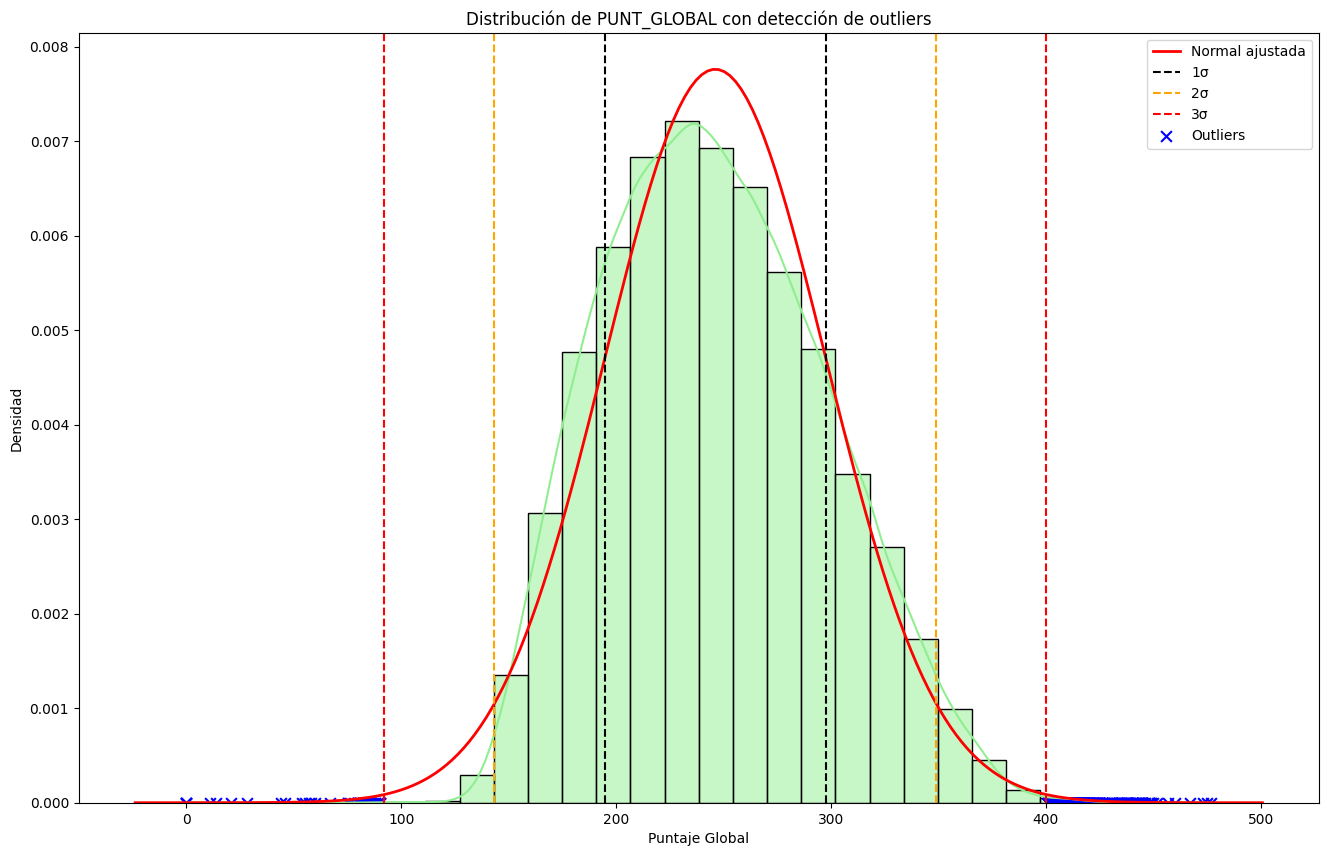

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

plt.figure(figsize=(16,10))

# Histograma con KDE
sns.histplot(y, kde=True, stat="density", bins=30, color="lightgreen", edgecolor="black")

# Curva normal teórica
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 200)
plt.plot(xx, norm.pdf(xx, mu, sigma), 'r', lw=2, label="Normal ajustada")

# Líneas verticales de 1σ, 2σ, 3σ
for k, col in zip([1,2,3], ["black","orange","red"]):
    plt.axvline(mu + k*sigma, color=col, linestyle="--")
    plt.axvline(mu - k*sigma, color=col, linestyle="--", label=f"{k}σ")

# Graficar puntos outliers
plt.scatter(y.loc[outlier_idx], [0]*len(outlier_idx), 
            color="blue", marker="x", s=60, label="Outliers")

plt.title("Distribución de PUNT_GLOBAL con detección de outliers")
plt.xlabel("Puntaje Global")
plt.ylabel("Densidad")
plt.legend()
plt.show()

## 5. Estandarización de Categorías

In [ ]:
nom_propio_cat = ["nacionalidad", "dpto_est_reside", "mpio_est_reside", "num_libros", "colegio_genero", "colegio_naturaleza",
                  "colegio_caracter", "colegio_area", "colegio_jornada", "colegio_mpio", "colegio_dpto", "est_mpio_presento_examen", 
                  "est_dpto_presento_examen"]

icfes[nom_propio_cat] = icfes[nom_propio_cat].apply(lambda x: x.str.title() if x.dtype == "object" else x)
icfes.head(4)

## 6. Agrupamiento de Categorías

### 6.1 Reemplazar el Símbolo "-" por NAN

In [ ]:
### Cambiando el simbolo "-" por NaN para poder imputar después
# Lista para almacenar las columnas que contienen "-"
columnas_con_guion = [col for col in icfes.columns if "-" in icfes[col].astype(str).unique()]
print(columnas_con_guion)  # 🔍 Muestra las columnas que contienen "-"

for col in columnas_con_guion:
    icfes[col] = icfes[col].replace({"-": np.nan})

In [ ]:
### Insertando NA's
icfes["genero"] = icfes["genero"].replace({'M': 'Masculino', 'F': 'Femenino'})

# Verificar los valores después del reemplazo
print(icfes["genero"].value_counts(dropna=False))  # Muestra también los NaN

### 6.2 Variables del Estudiante

In [ ]:
icfes.sample(4)

In [ ]:
icfes['nse_estudiante'].value_counts(dropna=False)

In [ ]:
icfes['nse_estudiante'] = icfes['nse_estudiante'].astype('float64')

In [ ]:
icfes["pertenece_etnia"].value_counts().sort_index()

In [ ]:
icfes["etnia_estudiante"].value_counts(dropna = False).sort_index()

In [ ]:
icfes["etnia_estudiante"] = icfes["etnia_estudiante"].replace({
    np.nan: "No",
    'Comunidad afrodescendiente': 'Afro',
    'Comunidades Rom (Gitanas)': 'Gitano',
    'Ninguno': 'No',
    'Otro grupo étnico minoritario': 'Otra'
    })

icfes["etnia_estudiante"].value_counts(dropna = False).sort_index()

In [ ]:
icfes['ESTU_FECHANACIMIENTO'] = pd.to_datetime(
    icfes['ESTU_FECHANACIMIENTO'],
    format='mixed',
    dayfirst=True,
    errors='coerce'
)

icfes['ESTU_FECHANACIMIENTO'].head()
icfes['ESTU_FECHANACIMIENTO'].isna().mean() * 100  # porcentaje de fechas no convertidas

In [ ]:
def codificacion_dummy(df):
    # Renombrar columnas
    df.rename(columns={'nacionalidad': 'colombiano', 'etnia_estudiante': 'etnia'}, inplace=True)
    
    # Codificación binaria
    df['colombiano'] = (df['colombiano'] == 'Colombia').astype(int)
    df['etnia'] = (df['etnia'] != 'No').astype(int)
    
    return df

### 6.3 Variables del Hogar

In [ ]:
icfes["estrato_casa"].value_counts(dropna = False).sort_index()

In [ ]:
icfes["estrato_casa"] = icfes["estrato_casa"].replace({
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6,
    'Sin Estrato': np.nan,
    })

In [ ]:
icfes["num_personas_casa"].value_counts()

In [ ]:
icfes["num_personas_casa"] = icfes["num_personas_casa"].replace({
    '1 a 2': "Hogar tradicional", 
    '3 a 4': "Hogar tradicional", 
    '5 a 6': "Hogar grande", 
    '7 a 8': "Más de 1 hogar", 
    '9 o más': "Más de 1 hogar"
})

icfes["num_personas_casa"].value_counts()

In [ ]:
icfes['num_cuartos_casa'].value_counts(dropna = False)

In [ ]:
icfes['num_cuartos_casa'] = icfes['num_cuartos_casa'].replace({
    'Uno': 1,
    'Dos': 2,
    'Tres': 3,
    'Cuatro': 4,
    'Cinco': 5,
    'Seis o mas': 6
})

icfes['num_cuartos_casa'].value_counts(dropna = False).sort_values(ascending=True)

In [ ]:
icfes["internet"].value_counts(dropna = False)

In [ ]:
icfes["computador"].value_counts(dropna = False)

In [ ]:
icfes["lavadora"].value_counts(dropna = False)

In [ ]:
icfes["microndas"].value_counts(dropna = False)

In [ ]:
icfes["carro"].value_counts(dropna = False)

In [ ]:
icfes["moto"].value_counts(dropna = False)

In [ ]:
icfes["consola"].value_counts(dropna = False)

In [ ]:
columnas = ['pertenece_etnia', 'internet', 'tv', 'computador', 'lavadora', 'microndas', 'carro', 'moto', 'consola']

for col in columnas:
    icfes[col] = np.where(icfes[col] == 'Si', 1, 0)

In [ ]:
icfes.sample(6)

### 6.4 Variables de Educación y Trabajo en el Hogar

In [ ]:
icfes["nivel_edu_madre"].value_counts(dropna = False).sort_index(ascending = True)

In [ ]:
icfes["nivel_edu_madre"] = icfes["nivel_edu_madre"].replace({
  'Educación profesional completa': 'Profesional',
  'Educación profesional incompleta': 'Profesional Inc',
  'Ninguno': 'Ninguna',
  'No Aplica': 'No aplica',
  'No sabe': np.nan,
  'Primaria completa': 'Primaria',
  'Primaria incompleta': 'Primaria Inc',
  'Secundaria (Bachillerato) completa': 'Bachiller',
  'Secundaria (Bachillerato) incompleta': 'Bachiller Inc',
  'Técnica o tecnológica completa': 'Tecnico/Tecnologo',
  'Técnica o tecnológica incompleta': 'Tecnico/Tecnologo Inc'
})

icfes["nivel_edu_madre"].value_counts(dropna = False).sort_index(ascending = True)

In [ ]:
icfes["nivel_edu_padre"].value_counts(dropna = False).sort_index(ascending = True)

In [ ]:
icfes["nivel_edu_padre"] = icfes["nivel_edu_padre"].replace({
  'Educación profesional completa': 'Profesional',
  'Educación profesional incompleta': 'Profesional Inc',
  'Ninguno': 'Ninguna',
  'No Aplica': 'No aplica',
  'No sabe': np.nan,
  'Primaria completa': 'Primaria',
  'Primaria incompleta': 'Primaria Inc',
  'Secundaria (Bachillerato) completa': 'Bachiller',
  'Secundaria (Bachillerato) incompleta': 'Bachiller Inc',
  'Técnica o tecnológica completa': 'Tecnico/Tecnologo',
  'Técnica o tecnológica incompleta': 'Tecnico/Tecnologo Inc'
})

icfes["nivel_edu_padre"].value_counts(dropna = False).sort_index(ascending = True)

In [ ]:
icfes["actividad_madre"].value_counts(dropna = False).sort_index()

In [ ]:
# Definir el mapeo de categorías
mapeo = {
    # Profesionales y Directivos
    'Es dueño de un negocio grande, tiene un cargo de nivel directivo o gerencial': 'Directivos',
    'Trabaja como profesional (por ejemplo médico, abogado, ingeniero)': 'Profesionales',

    # Trabajadores Independientes y Pequeños Empresarios
    'Es dueño de un negocio pequeño (tiene pocos empleados o no tiene, por ejemplo tienda, papelería, etc': 'Microempresario',
    'Trabaja por cuenta propia (por ejemplo plomero, electricista)': 'Trabajador Independiente',

    # Trabajadores Operativos y de Servicios
    'Es operario de máquinas o conduce vehículos (taxita, chofer)': 'Trabajadores Operativos',
    'Es vendedor o trabaja en atención al público': 'Trabajadores Operativos',
    'Tiene un trabajo de tipo auxiliar administrativo (por ejemplo, secretario o asistente)': 'Trabajadores Operativos',
    'Trabaja como personal de limpieza, mantenimiento, seguridad o construcción': 'Trabajadores Operativos',
    
    # Trabajadores del Sector Primario
    'Es agricultor, pesquero o jornalero': 'Sector Primario',
    
    # Sin Actividad Laboral Remunerada
    'Trabaja en el hogar, no trabaja o estudia': 'Sin Actividad Remunerada',
    'Pensionado': 'Pensionado',
    
    # Datos No Disponibles
    'No aplica': 'No Aplica',
    'No sabe': 'Sin Información'
}

# Aplicar la reclasificación directamente a cada columna
icfes['actividad_madre'] = icfes['actividad_madre'].map(mapeo)
icfes['actividad_padre'] = icfes['actividad_padre'].map(mapeo)

In [ ]:
icfes['actividad_padre'].value_counts(dropna = False)

In [ ]:
icfes.head(4)

In [ ]:
icfes["horas_trabajo_semanal"].value_counts()

In [ ]:
icfes["horas_trabajo_semanal"] = icfes["horas_trabajo_semanal"].replace({'0': 'No Trabaja',
        'Menos de 10 horas': 'Trabajo Ocasional',
        'Entre 11 y 20 horas': 'Tiempo Parcial Reducido',
        'Entre 21 y 30 horas': 'Medio Tiempo',
        'Más de 30 horas': 'Tiempo Completo'
})

icfes["horas_trabajo_semanal"].value_counts()

In [ ]:
icfes["tipo_remuneracion"].value_counts()

In [ ]:
icfes["tipo_remuneracion"] = icfes["tipo_remuneracion"].replace({'No': 'Sin Remuneración',
        'Si, en efectivo': 'Remuneración Monetaria',
        'Si, en especie': 'Remuneración No Monetaria',
        'Si, en efectivo y especie': 'Remuneración Mixta'})

icfes["tipo_remuneracion"].value_counts()

In [ ]:
# Si "horas_trabajo_semanal" es "No Trabaja", cambiar "tipo_remuneracion" a "No Aplica"
icfes.loc[icfes["horas_trabajo_semanal"] == "No Trabaja", "tipo_remuneracion"] = "No Aplica"

### 6.5 Variables de Entretenimiento

In [ ]:
icfes.head(4)

In [ ]:
icfes["num_libros"].value_counts(dropna = False)

In [ ]:
icfes["num_libros"] = icfes["num_libros"].replace({'0 A 10 Libros': '0-10', '11 A 25 Libros': '11-25',
                                                   '26 A 100 Libros': '26-100', 'Más De 100 Libros': '>100'})

icfes["num_libros"].value_counts(dropna = False)

In [ ]:
icfes["tiempo_lectura"].value_counts(dropna = False)

In [ ]:
icfes["tiempo_lectura"] = icfes["tiempo_lectura"].replace({'No leo por entretenimiento': 'No lee', '30 minutos o menos': '0-30 min',
                                                           'Entre 30 y 60 minutos': '30-60 min', 'Entre 1 y 2 horas': '1-2h', 'Más de 2 horas': '>2h'})

icfes["tiempo_lectura"].value_counts(dropna = False)

In [ ]:
icfes["tiempo_internet"].value_counts(dropna = False)

In [ ]:
icfes["tiempo_internet"] = icfes["tiempo_internet"].replace({'No Navega Internet': 'Ninguno', '30 minutos o menos': 'Poco',
                                                             'Entre 30 y 60 minutos': 'Moderado', 'Entre 1 y 3 horas': 'Promedio', 'Más de 3 horas': 'Mucho'})

icfes["tiempo_internet"].value_counts(dropna = False)

### 6.6 Variables de Alimentación

In [ ]:
icfes.head(5)

In [ ]:
icfes["freq_leche_derivados"].value_counts()

In [ ]:
icfes["freq_carne_pescado_similares"].value_counts()

In [ ]:
icfes["freq_cereales_frutos_legumbres"].value_counts()

In [ ]:
mapping = {
    'Nunca o rara vez comemos eso': 'Muy Insuficiente',
    '1 o 2 veces por semana': 'Insuficiente',
    '3 a 5 veces por semana': 'Aceptable',
    'Todos o casi todos los días': 'Óptimo'
}

cols = ["freq_leche_derivados", 
        "freq_carne_pescado_similares", 
        "freq_cereales_frutos_legumbres"]

icfes[cols] = icfes[cols].replace(mapping)
icfes.sample(8)

In [ ]:
icfes.head(5)

### 6.7 Variables de Colegios

In [ ]:
icfes.head(4)

In [ ]:
icfes["colegio_genero"].value_counts(dropna = False)

In [ ]:
icfes["colegio_naturaleza"].value_counts(dropna = False)

In [ ]:
icfes["colegio_calendario"] = icfes["colegio_calendario"].str.capitalize()

In [ ]:
icfes["colegio_calendario"].value_counts(dropna = False)

In [ ]:
icfes["colegio_caracter"].value_counts(dropna = False)

In [ ]:
icfes["colegio_area"].value_counts(dropna = False)

In [ ]:
icfes["colegio_jornada"].value_counts(dropna = False)

### 6.8 Variables de Fecha y Edad

In [ ]:
# 1. Corregir fechas que inician con "000"
icfes["fecha_nac"] = icfes["fecha_nac"].astype(str).str.replace(r"^000", "2", regex=True)

# 2. Convertir la columna a tipo fecha manejando distintos formatos
icfes["fecha_nac"] = pd.to_datetime(icfes["fecha_nac"], errors="coerce", dayfirst=True)

# 3. Extraer solo el año
icfes["año_nacimiento"] = icfes["fecha_nac"].dt.year

# 4. Contar cuántas veces aparece cada año
conteo_fechas = icfes["año_nacimiento"].value_counts().sort_index()

# 5. Crear la variable Edad
icfes["edad"] = 2019 - icfes["año_nacimiento"]

# 6. Quitamos los decimales
icfes["edad"] = icfes["edad"].round(0).astype("Int64")

# Mostrar resultados
print(conteo_fechas)

In [ ]:
icfes["edad"].value_counts(dropna = False)

In [ ]:
plt.figure(figsize = (12, 10))
sns.countplot(x = 'edad', data = icfes)
sns.set_theme(style = 'white', context = 'talk')

plt.title('Distribución de Edades')
plt.xlabel('Edades', fontsize = 12)
plt.ylabel('Cantidad', fontsize = 12)
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

In [ ]:
## Nos quedamos solo con las edades entre 14 y 79 años
icfes = icfes[(icfes["edad"] >= 14) & (icfes["edad"] <= 79)]

In [ ]:
# Definir los límites de los bins
bins = list(range(15, 81, 5))  # De 15 a 80 en pasos de 5

# Crear etiquetas para los bins
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]

# Crear la nueva variable 'grupo_edad'
icfes["grupo_edad"] = pd.cut(icfes["edad"], bins=bins, labels=labels, right=False)

# Verificar distribución
print(icfes["grupo_edad"].value_counts(dropna = False))

In [ ]:
plt.figure(figsize = (12, 10))
sns.countplot(x = 'grupo_edad', data = icfes)
sns.set_theme(style = 'white', context = 'talk')

plt.title('Distribución de Edades')
plt.xlabel('Edades', fontsize = 12)
plt.ylabel('Cantidad', fontsize = 12)
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

In [ ]:
icfes["grupo_edad"].value_counts(dropna = False)

In [ ]:
# Crear la variable
icfes['presento_fuera_edad'] = (icfes['edad'] > 19).astype(int)

# Verificar distribución
print("Distribución de la variable:")
print(icfes['presento_fuera_edad'].value_counts())
print('------------------------------------------------------')
print(f"\nPorcentaje fuera de edad: {icfes['presento_fuera_edad'].mean():.2%}")
print('------------------------------------------------------')

# Verificar algunos casos
print("\nVerificación manual:")
print(icfes[['edad', 'presento_fuera_edad']].head(10))

# Estadísticas por grupo
print("\nEdad promedio por grupo:")
print(icfes.groupby('presento_fuera_edad')['edad'].agg(['count', 'mean', 'min', 'max']))

### 6.9 Variables Geográficas

In [ ]:
icfes['colegio_dpto'].value_counts(dropna = False)

In [ ]:
# Crear un diccionario con la asignación de departamentos a regiones
departamento_a_region = {
    # Región Andina
    'Antioquia': 'Andina', 'Boyaca': 'Andina', 'Caldas': 'Andina', 'Cundinamarca': 'Andina',
    'Huila': 'Andina', 'Norte Santander': 'Andina', 'Quindio': 'Andina',
    'Risaralda': 'Andina', 'Santander': 'Andina', 'Tolima': 'Andina', 'Bogotá': 'Andina',

    # Región Caribe
    'Atlantico': 'Caribe', 'Bolivar': 'Caribe', 'Cesar': 'Caribe', 'Cordoba': 'Caribe',
    'La Guajira': 'Caribe', 'Magdalena': 'Caribe', 'Sucre': 'Caribe','San Andres': 'Caribe',

    # Región Pacífica
    'Cauca': 'Pacífica', 'Choco': 'Pacífica', 'Nariño': 'Pacífica', 'Valle': 'Pacífica',

    # Región Orinoquía
    'Meta': 'Orinoquía', 'Arauca': 'Orinoquía', 'Casanare': 'Orinoquía', 'Vichada': 'Orinoquía',

    # Región Amazónica
    'Caqueta': 'Amazónica', 'Putumayo': 'Amazónica', 'Amazonas': 'Amazónica',
    'Guainia': 'Amazónica', 'Guaviare': 'Amazónica', 'Vaupes': 'Amazónica'
}

# Crear la nueva variable 'region' en el dataframe ICFES
icfes['region'] = icfes['colegio_dpto'].map(departamento_a_region)

# Verificar si hay departamentos sin asignación
print(icfes[icfes['region'].isna()]['colegio_dpto'].unique())

## 7. Eliminar Filas

In [ ]:
var_eli = ["est_mpio_presento_examen", "est_dpto_presento_examen", 
           "fecha_nac", "año_nacimiento", 'pertenece_etnia', "dpto_est_reside", "mpio_est_reside"]

icfes = icfes.drop(columns=var_eli)
icfes.sample(4)

In [ ]:
# Analizar el porcentaje de missing values
missing_analysis = pd.DataFrame({
    'Column': icfes.columns,
    'Missing_Count': icfes.isnull().sum(),
    'Missing_Percentage': (icfes.isnull().sum() / len(icfes)) * 100
}).sort_values('Missing_Percentage', ascending=False)

print(missing_analysis)

In [ ]:
# Análisis por fila
missing_per_row = icfes.isnull().sum(axis=1)
print(f"Filas sin missing: {(missing_per_row == 0).sum()}")
print(f"Filas con 1 missing: {(missing_per_row == 1).sum()}")
print(f"Filas con 2 missing: {(missing_per_row == 2).sum()}")
print(f"Filas con 1-2 missing: {((missing_per_row >= 1) & (missing_per_row <= 2)).sum()}")
print(f"Filas con 3 missing: {(missing_per_row == 3).sum()}")
print(f"Filas con 4 missing: {(missing_per_row == 4).sum()}")
print(f"Filas con 3-4 missing: {((missing_per_row >= 3) & (missing_per_row <= 4)).sum()}")
print(f"Filas con 5 missing: {(missing_per_row == 5).sum()}")
print(f"Filas con >5 missing: {(missing_per_row > 5).sum()}")

In [ ]:
columnas_a_eliminar = ["grupo_edad", "genero"]

filas_antes = icfes.shape[0]

# Eliminar filas con NA en estas columnas
icfes = icfes.dropna(subset=columnas_a_eliminar)

# Mostrar la cantidad de filas restantes
print(f"Cantidad de filas antes de eliminar NA: {filas_antes}")
print("------------------------------------------------------")
print(f"Cantidad de filas después de eliminar NA: {icfes.shape[0]}")
print("------------------------------------------------------")
print(f"Filas eliminadas: {filas_antes - icfes.shape[0]}")

In [ ]:
# Información básica del dataset
total_columnas = icfes.shape[1]
print(f"Total de columnas en el dataset: {total_columnas}")
print("\n📊 CONVERSIÓN DE PORCENTAJES A NÚMEROS ABSOLUTOS")
print("=" * 60)

# Calcular cuántos NAs corresponden a cada porcentaje
porcentajes = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

for pct in porcentajes:
    num_nas = (pct / 100) * total_columnas
    num_nas_entero = int(num_nas)
    num_nas_redondeado = round(num_nas)
    
    print(f"{pct}% de NA = {num_nas:.1f} columnas ≈ {num_nas_redondeado} columnas")

In [ ]:
# Contar NA por fila
na_por_fila = icfes.isna().sum(axis=1)

# Calcular el porcentaje de NA por fila
porcentaje_na_por_fila = (na_por_fila / icfes.shape[1]) * 100

# Información del dataset
total_columnas = icfes.shape[1]

# Calcular equivalencias en números absolutos
nas_10_pct = round((10 / 100) * total_columnas)
nas_20_pct = round((20 / 100) * total_columnas)
nas_25_pct = round((25 / 100) * total_columnas)

# Contar filas con más del 25% de NA
filas_con_mas_25_na = (porcentaje_na_por_fila > 25).sum()

# Estadísticas adicionales
na_promedio_por_fila = porcentaje_na_por_fila.mean()
nas_promedio_absoluto = round((na_promedio_por_fila / 100) * total_columnas)
indice_fila_max_na = na_por_fila.idxmax()
maximo_na = na_por_fila.max()
porcentaje_max_na = porcentaje_na_por_fila.max()

# Resultados con equivalencias
print(f"Dataset tiene {total_columnas} columnas totales")
print("-" * 50)
print(f"Hay {((porcentaje_na_por_fila >= 10) & (porcentaje_na_por_fila < 20)).sum()} filas entre el 10% y 20% de NA (entre {nas_10_pct} y {nas_20_pct-1} columnas faltantes)")
print(f"Hay {(porcentaje_na_por_fila == 20).sum()} filas con exactamente el 20% de NA (exactamente {nas_20_pct} columnas faltantes)")
print(f"Hay {filas_con_mas_25_na} filas con más del 25% de NA (más de {nas_25_pct} columnas faltantes)")
print(f"Promedio de NA por fila: {na_promedio_por_fila:.2f}% (≈ {nas_promedio_absoluto} columnas faltantes)")
print(f"La fila con más NA es la fila {indice_fila_max_na} con {maximo_na} valores NA ({porcentaje_max_na:.2f}%)")

In [ ]:
filas_antes = icfes.shape[0]

# 1. Contar los NA por fila
na_counts_per_row = icfes.isna().sum(axis=1)

# 2. Filtrar las filas con más de 5 NA
rows_to_drop = na_counts_per_row[na_counts_per_row >= 5].index

# 3. Eliminar las filas filtradas
icfes = icfes.drop(rows_to_drop)

print(f"Se eliminaron {len(rows_to_drop)} filas con más de 5 valores NA.")

# Mostrar la cantidad de filas restantes
print(f'Cantidad de filas antes de eliminar NA: {filas_antes}')
print(f"Cantidad de filas después de eliminar NA: {icfes.shape[0]}")
print(f"Filas eliminadas: {filas_antes - icfes.shape[0]}")

In [ ]:
icfes.shape

In [ ]:
icfes.columns

In [ ]:
orden_variables = ['nacionalidad', 'genero', 'region', 'etnia_estudiante', 'edad', 'grupo_edad', 'presento_fuera_edad', 'num_personas_casa', 'num_cuartos_casa', 'estrato_casa',
                   'tiempo_internet', 'internet', 'tv', 'computador', 'lavadora', 'microndas', 'carro', 'moto', 'consola', 'situacion_economica_casa',
                   'num_libros', 'tiempo_lectura', 'freq_leche_derivados', 'freq_carne_pescado_similares', 'freq_cereales_frutos_legumbres',
                   'nivel_edu_padre', 'actividad_padre', 'nivel_edu_madre', 'actividad_madre', 'horas_trabajo_semanal', 'tipo_remuneracion',
                   'colegio_genero', 'colegio_naturaleza', 'colegio_calendario', 'colegio_caracter', 'colegio_area', 'colegio_jornada', 'colegio_mpio', 'colegio_dpto', 'puntaje_lectura',
                   'percentil_lectura', 'puntaje_matematicas', 'percentil_matematicas', 'nivel_matematicas', 'puntaje_naturales', 'percentil_naturales', 'nivel_naturales', 'puntaje_sociales', 
                   'percentil_sociales', 'nivel_sociales', 'puntaje_ingles', 'percentil_ingles', 'nivel_ingles', 'puntaje_global', 'percentil_global', 'inse_estudiante', 
                   'nse_estudiante', 'nse_colegio']

icfes = icfes[orden_variables]

In [ ]:
# Guardar DataFrame en parquet
icfes.to_parquet("icfes_limpio.parquet", index=False, engine="pyarrow")